<a href="https://colab.research.google.com/github/LEE-1017/Gener--AI/blob/main/HW7%20NTNU41040123s%E6%95%B8114_%E6%9D%8E%E6%B5%A9%E6%8F%9A_%E6%8B%86%E5%BD%88%E7%89%9B%E8%82%89_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

這次的作業是受到了這段影片的啟發:https://www.youtube.com/watch?v=ZSF7SuEgIZo

裡面用AI當讀書方感覺很帥
這次的程式我是請GPT幫忙的，我大部分是參考老師的程式，但在呈現上我用了類似GPT的介面，這裡是我請GPT幫忙做的，我讓它有一個history變數，理論上它能記住一些內容...吧?

未來應該能改得更人性化，但目前現階段先這樣就好我猜
以下是一些運作截圖

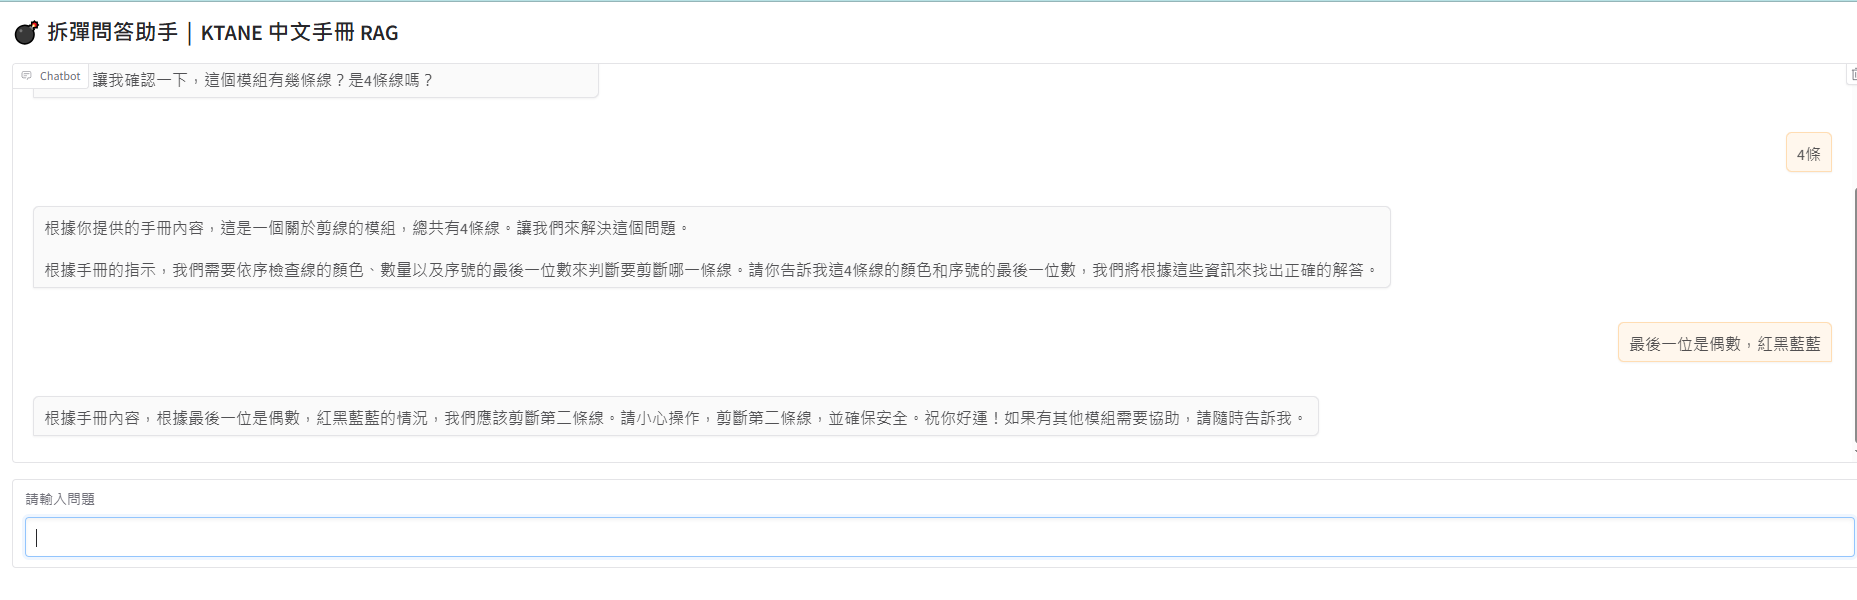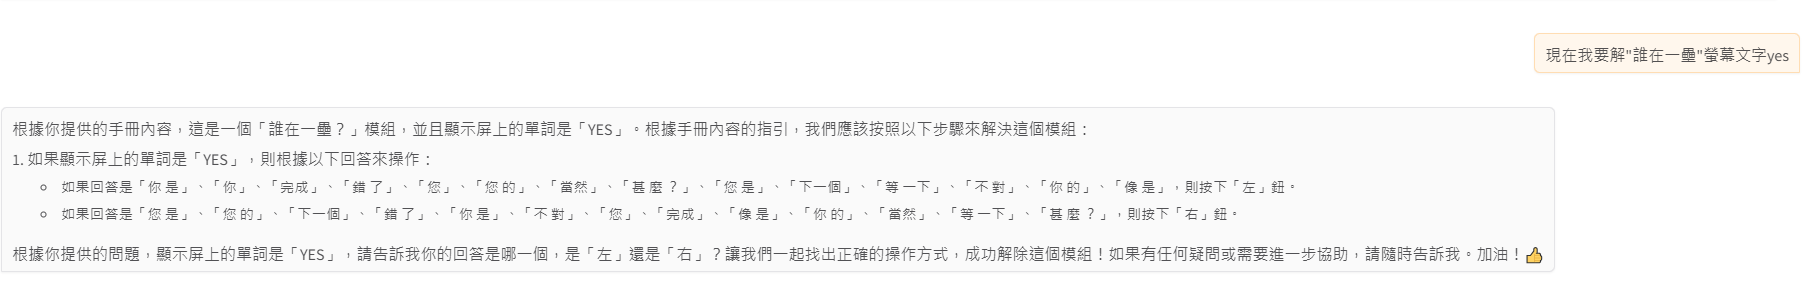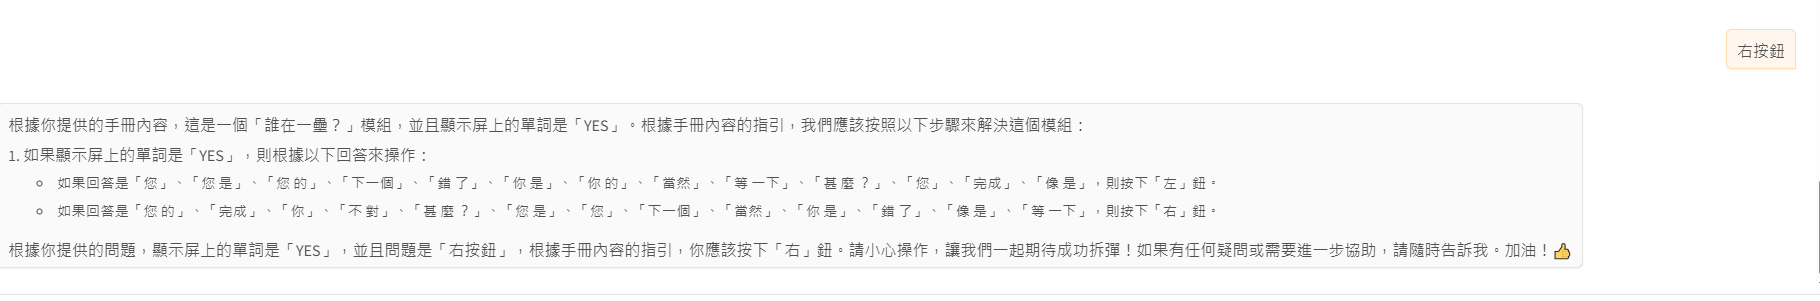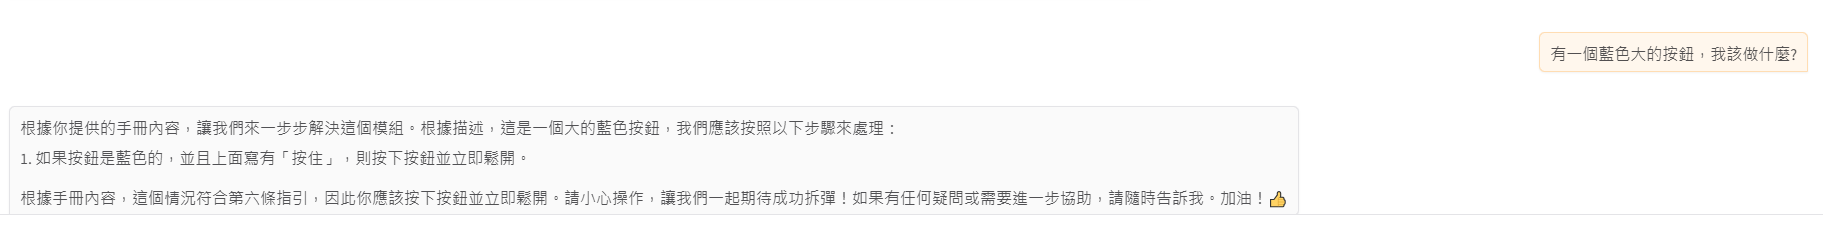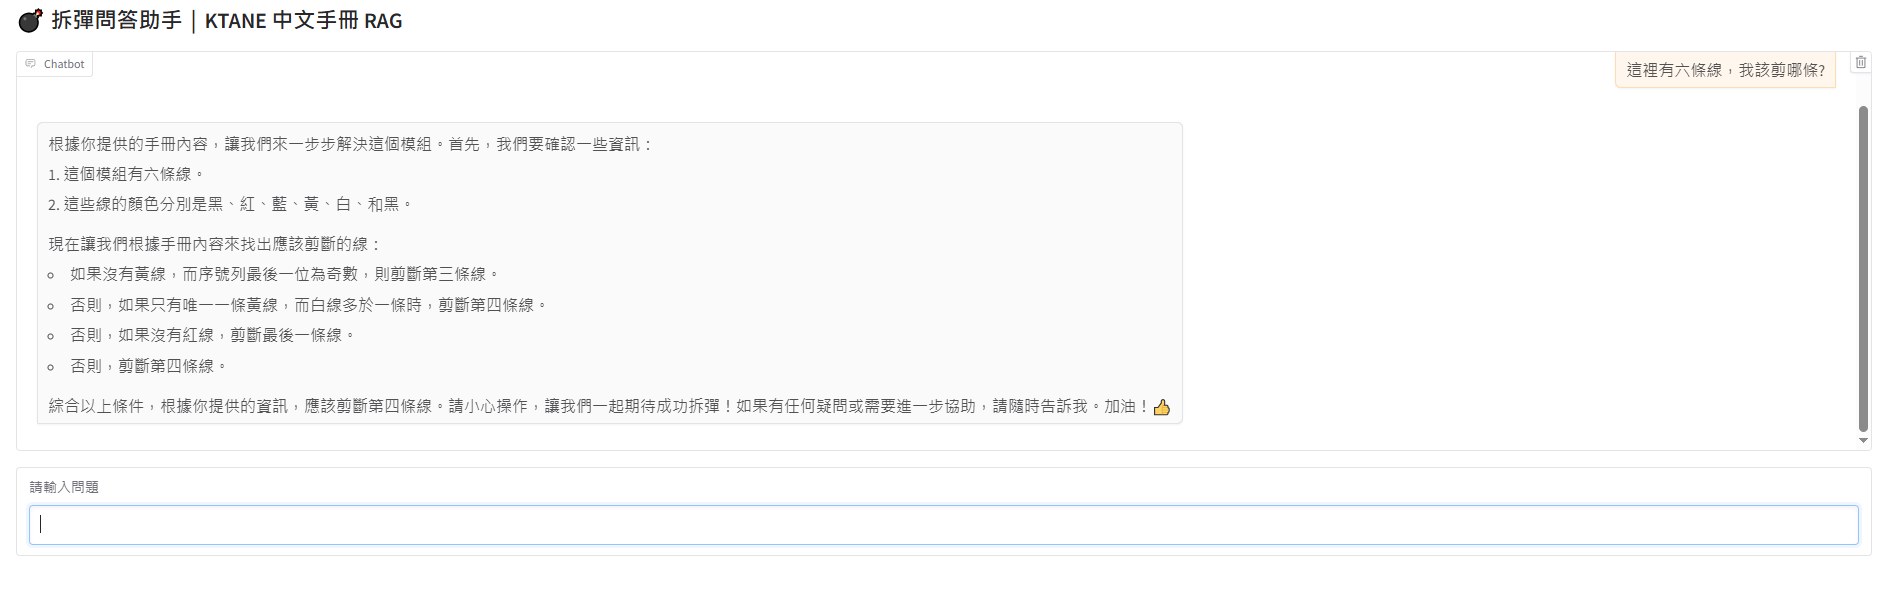

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#如果有需要再開，但我傾向直接上傳

Mounted at /content/drive


In [ ]:
!unzip faiss_db.zip

Archive:  faiss_db.zip
   creating: faiss_db/
  inflating: faiss_db/index.faiss    
  inflating: faiss_db/index.pkl      


In [ ]:
!pip install -U langchain langchain-community sentence-transformers faiss-cpu gradio openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.8/351.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import gradio as gr
import random
import re
import openai
import os
from google.colab import userdata

#【使用 OpenAI】
api_key = userdata.get('OpenAI')
model = "gpt-4"
client = openai.OpenAI(api_key=api_key)

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain



---



In [ ]:
class CustomE5Embedding(HuggingFaceEmbeddings):
    def embed_documents(self, texts):
        texts = [f"passage: {t}" for t in texts]
        return super().embed_documents(texts)

    def embed_query(self, text):
        return super().embed_query(f"query: {text}")

In [ ]:
embedding_model = CustomE5Embedding(model_name="intfloat/multilingual-e5-small")
db = FAISS.load_local("faiss_db", embedding_model, allow_dangerous_deserialization=True)
retriever = db.as_retriever(search_kwargs={"k": 5}) # 取前5筆

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/498k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [ ]:
import os
import openai
from google.colab import userdata
from openai import OpenAI
# 從 Google Colab 的 userdata 拿 API 金鑰
api_key = userdata.get("OpenAI")
client = OpenAI(api_key=api_key)

In [ ]:
# 🔁 主邏輯：維持 chat_history 並回覆
def chat_rag(user_message, history):
    # 將 chat history 整理為 GPT 可接受格式
    messages = [{"role": "system", "content": (
    "你是一位冷靜而專業的炸彈拆除遊戲《Keep Talking and Nobody Explodes》的專家助理，"
    "你的任務是根據手冊內容**一步一步**引導使用者拆除炸彈模組，"
    "請使用清楚、親切、實戰感強的語氣與玩家互動，像是在危機現場的夥伴一樣。"

    "請記住以下原則：\n"
    "- 先觀察使用者輸入，再判斷可能是哪一種模組。\n"
    "- 如果不確定模組，可主動詢問使用者模組特徵。\n"
    "- 回應時務必維持「拆彈助手」的口吻，清楚但不死板。"

    "目標是協助玩家成功拆除炸彈，而不是單純重複規則。"
)}]

    for q, a in history:
        messages.append({"role": "user", "content": q})
        messages.append({"role": "assistant", "content": a})
    messages.append({"role": "user", "content": user_message})

    # 檢索相關內容
    docs = retriever.get_relevant_documents(user_message)
    context = "\n\n".join([doc.page_content for doc in docs])

    # 將手冊內容插入 user message（不動歷史）
    messages[-1]["content"] = f"以下是手冊內容：\n{context}\n\n問題：{user_message}"

    # 呼叫 GPT
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0.3,
    )

    answer = response.choices[0].message.content
    history.append((user_message, answer))
    return history, history  # 回傳給 chatbot 與 state

In [ ]:
# 🧠 Gradio ChatBot 模式（支援連續對話）
with gr.Blocks() as demo:
    gr.Markdown("## 💣 拆彈問答助手｜KTANE 中文手冊 RAG")
    chatbot = gr.Chatbot()
    msg = gr.Textbox(label="請輸入問題")
    state = gr.State([])  # 儲存 chat history

    msg.submit(chat_rag, [msg, state], [chatbot, state])
    msg.submit(lambda: "", None, msg)  # 清空輸入框

# 🚀 啟動服務
demo.launch(share=True)


<ipython-input-10-dfe71de49d07>:4: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c8d069d1a5131b4995.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
